In [18]:
import pandas as pd

df = pd.read_csv('./data/disaster-tweets.csv', encoding='ISO-8859-1')
print(df.head())

    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  778243823     True      golden                 156               NaN   
1  778243824     True      golden                 152               NaN   
2  778243825     True      golden                 137               NaN   
3  778243826     True      golden                 136               NaN   
4  778243827     True      golden                 138               NaN   

  choose_one  choose_one:confidence choose_one_gold keyword location  \
0   Relevant                 1.0000        Relevant     NaN      NaN   
1   Relevant                 1.0000        Relevant     NaN      NaN   
2   Relevant                 1.0000        Relevant     NaN      NaN   
3   Relevant                 0.9603        Relevant     NaN      NaN   
4   Relevant                 1.0000        Relevant     NaN      NaN   

                                                text  tweetid  userid  
0                 Just happened a terrible c

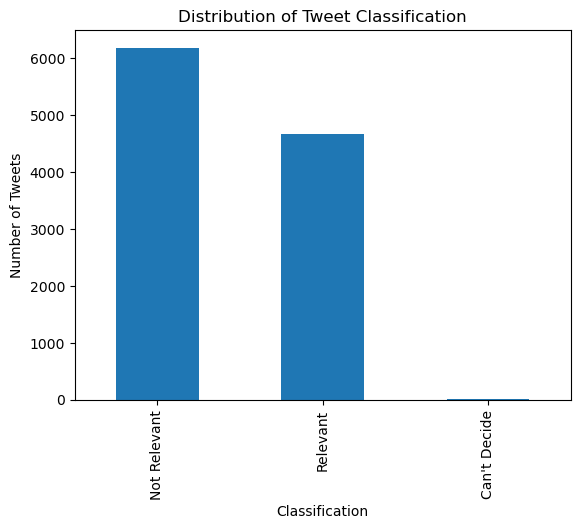

In [19]:
import matplotlib.pyplot as plt

# Plot the counts of each classification
df['choose_one'].value_counts().plot(kind='bar')
plt.title('Distribution of Tweet Classification')
plt.xlabel('Classification')
plt.ylabel('Number of Tweets')
plt.show()

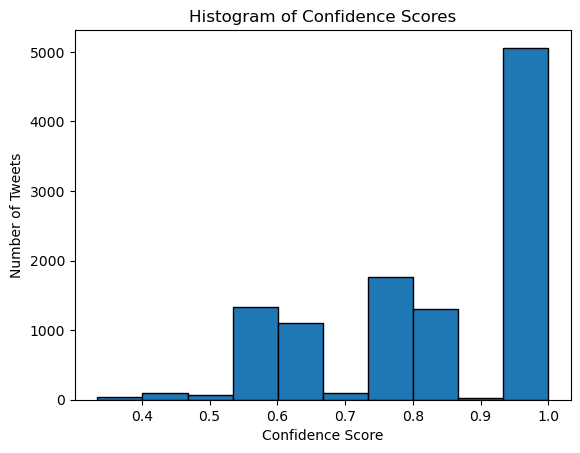

In [20]:
df['choose_one:confidence'].plot(kind='hist', edgecolor='black', bins=10)
plt.title('Histogram of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Number of Tweets')
plt.show()

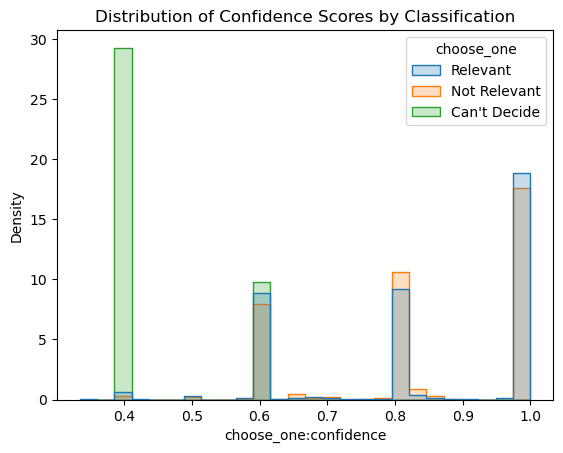

In [21]:
import seaborn as sns

sns.histplot(data=df, x='choose_one:confidence', hue='choose_one', element='step', stat="density", common_norm=False)
plt.title('Distribution of Confidence Scores by Classification')
plt.show()


In [22]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

# Apply the tokenizer to each row of the 'text' column
df['tokens'] = df['text'].apply(
    lambda x: [token.lower() for token in tokenizer.tokenize(str(x))])

# Print the first five rows of the new column
print(df[['text', 'tokens']].head())

                                                text  \
0                 Just happened a terrible car crash   
1  Our Deeds are the Reason of this #earthquake M...   
2  Heard about #earthquake is different cities, s...   
3  there is a forest fire at spot pond, geese are...   
4             Forest fire near La Ronge Sask. Canada   

                                              tokens  
0          [just, happened, a, terrible, car, crash]  
1  [our, deeds, are, the, reason, of, this, #eart...  
2  [heard, about, #earthquake, is, different, cit...  
3  [there, is, a, forest, fire, at, spot, pond, ,...  
4   [forest, fire, near, la, ronge, sask, ., canada]  


In [23]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['tokens_without_stopwords'] = df['tokens'].apply(
    lambda x: [word for word in x if word.lower() not in stop_words])

print(df[['tokens', 'tokens_without_stopwords']].head())

                                              tokens  \
0          [just, happened, a, terrible, car, crash]   
1  [our, deeds, are, the, reason, of, this, #eart...   
2  [heard, about, #earthquake, is, different, cit...   
3  [there, is, a, forest, fire, at, spot, pond, ,...   
4   [forest, fire, near, la, ronge, sask, ., canada]   

                            tokens_without_stopwords  
0                   [happened, terrible, car, crash]  
1  [deeds, reason, #earthquake, may, allah, forgi...  
2  [heard, #earthquake, different, cities, ,, sta...  
3  [forest, fire, spot, pond, ,, geese, fleeing, ...  
4   [forest, fire, near, la, ronge, sask, ., canada]  


In [24]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

df['stemmed_tokens'] = df['tokens_without_stopwords'].apply(
    lambda x: [stemmer.stem(word) for word in x])

print(df[['tokens_without_stopwords', 'stemmed_tokens']].head())

                            tokens_without_stopwords  \
0                   [happened, terrible, car, crash]   
1  [deeds, reason, #earthquake, may, allah, forgi...   
2  [heard, #earthquake, different, cities, ,, sta...   
3  [forest, fire, spot, pond, ,, geese, fleeing, ...   
4   [forest, fire, near, la, ronge, sask, ., canada]   

                                      stemmed_tokens  
0                      [happen, terribl, car, crash]  
1  [deed, reason, #earthquak, may, allah, forgiv,...  
2  [heard, #earthquak, differ, citi, ,, stay, saf...  
3  [forest, fire, spot, pond, ,, gees, flee, acro...  
4    [forest, fire, near, la, rong, sask, ., canada]  


In [25]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df["text_lemmatized"] = df["tokens_without_stopwords"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

print(df[['tokens_without_stopwords', 'text_lemmatized']].head())


                            tokens_without_stopwords  \
0                   [happened, terrible, car, crash]   
1  [deeds, reason, #earthquake, may, allah, forgi...   
2  [heard, #earthquake, different, cities, ,, sta...   
3  [forest, fire, spot, pond, ,, geese, fleeing, ...   
4   [forest, fire, near, la, ronge, sask, ., canada]   

                                     text_lemmatized  
0                   [happened, terrible, car, crash]  
1  [deed, reason, #earthquake, may, allah, forgiv...  
2  [heard, #earthquake, different, city, ,, stay,...  
3  [forest, fire, spot, pond, ,, goose, fleeing, ...  
4   [forest, fire, near, la, ronge, sask, ., canada]  


In [26]:
# Compare the stemmed and lemmatized versions of the first 20 tweets
for i in range(5):
    print('Original:', df['tokens_without_stopwords'][i])
    print('Stemmed:', df['stemmed_tokens'][i])
    print('Lemmatized:', df['text_lemmatized'][i])
    print()
    

Original: ['happened', 'terrible', 'car', 'crash']
Stemmed: ['happen', 'terribl', 'car', 'crash']
Lemmatized: ['happened', 'terrible', 'car', 'crash']

Original: ['deeds', 'reason', '#earthquake', 'may', 'allah', 'forgive', 'us']
Stemmed: ['deed', 'reason', '#earthquak', 'may', 'allah', 'forgiv', 'us']
Lemmatized: ['deed', 'reason', '#earthquake', 'may', 'allah', 'forgive', 'u']

Original: ['heard', '#earthquake', 'different', 'cities', ',', 'stay', 'safe', 'everyone', '.']
Stemmed: ['heard', '#earthquak', 'differ', 'citi', ',', 'stay', 'safe', 'everyon', '.']
Lemmatized: ['heard', '#earthquake', 'different', 'city', ',', 'stay', 'safe', 'everyone', '.']

Original: ['forest', 'fire', 'spot', 'pond', ',', 'geese', 'fleeing', 'across', 'street', ',', 'cannot', 'save']
Stemmed: ['forest', 'fire', 'spot', 'pond', ',', 'gees', 'flee', 'across', 'street', ',', 'cannot', 'save']
Lemmatized: ['forest', 'fire', 'spot', 'pond', ',', 'goose', 'fleeing', 'across', 'street', ',', 'cannot', 'save']


In [27]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user', 'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated", 'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens  
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    # corpus used for spell correction
    corrector="twitter", 
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # unpack contractions (can't -> can not)
    spell_correct_elong=True,  # spell correction for elongated words
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

df['cleaned_text'] = df['text'].apply(lambda x: " ".join(text_processor.pre_process_doc(x)))

print(df[['text', 'cleaned_text']].head())

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...
                                                text  \
0                 Just happened a terrible car crash   
1  Our Deeds are the Reason of this #earthquake M...   
2  Heard about #earthquake is different cities, s...   
3  there is a forest fire at spot pond, geese are...   
4             Forest fire near La Ronge Sask. Canada   

                                        cleaned_text  
0                 just happened a terrible car crash  
1  our deeds are the reason of this <hashtag> ear...  
2  heard about <hashtag> earthquake </hashtag> is...  
3  there is a forest fire at spot pond , geese ar...  
4            forest fire near la ronge sask . canada  


In [28]:
import re


def remove_special_characters_and_numbers(text):
    # This pattern matches any character that is NOT a word character (represented by \W)
    # or a whitespace (represented by \s). Additionally, it matches digits (represented by \d).
    return re.sub(r'[\W_]+|\d+', ' ', text)


df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_special_characters_and_numbers(x))

print(df[['text', 'cleaned_text']].head())

                                                text  \
0                 Just happened a terrible car crash   
1  Our Deeds are the Reason of this #earthquake M...   
2  Heard about #earthquake is different cities, s...   
3  there is a forest fire at spot pond, geese are...   
4             Forest fire near La Ronge Sask. Canada   

                                        cleaned_text  
0                 just happened a terrible car crash  
1  our deeds are the reason of this hashtag earth...  
2  heard about hashtag earthquake hashtag is diff...  
3  there is a forest fire at spot pond geese are ...  
4              forest fire near la ronge sask canada  


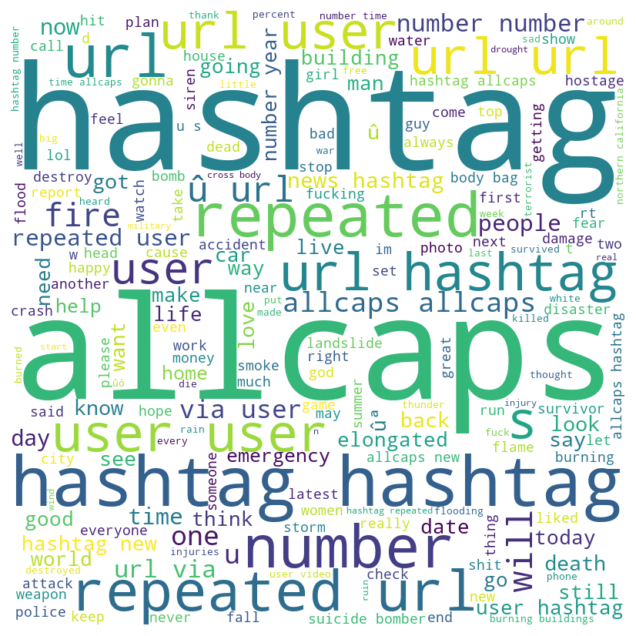

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the texts together
text = ' '.join(df['cleaned_text'])

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


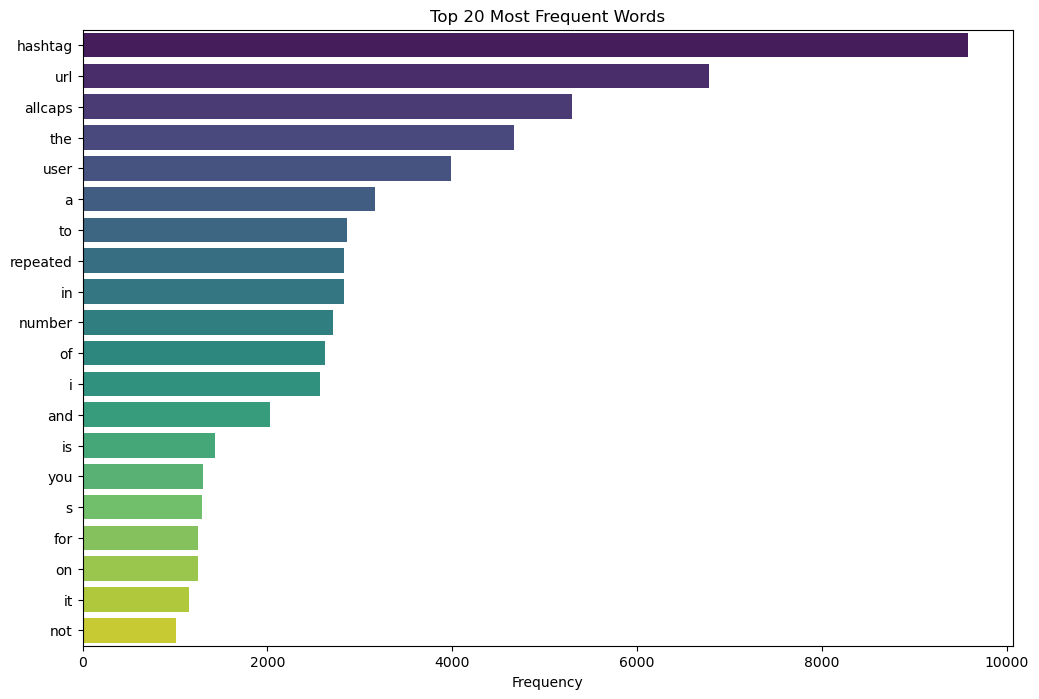

In [30]:
from collections import Counter
import seaborn as sns

# Tokenize and get the word frequency
words = ' '.join(df['cleaned_text']).split()
frequency = Counter(words)

# Select top N words
N = 20
most_common = frequency.most_common(N)
words, counts = zip(*most_common)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title(f"Top {N} Most Frequent Words")
plt.xlabel("Frequency")
plt.show()


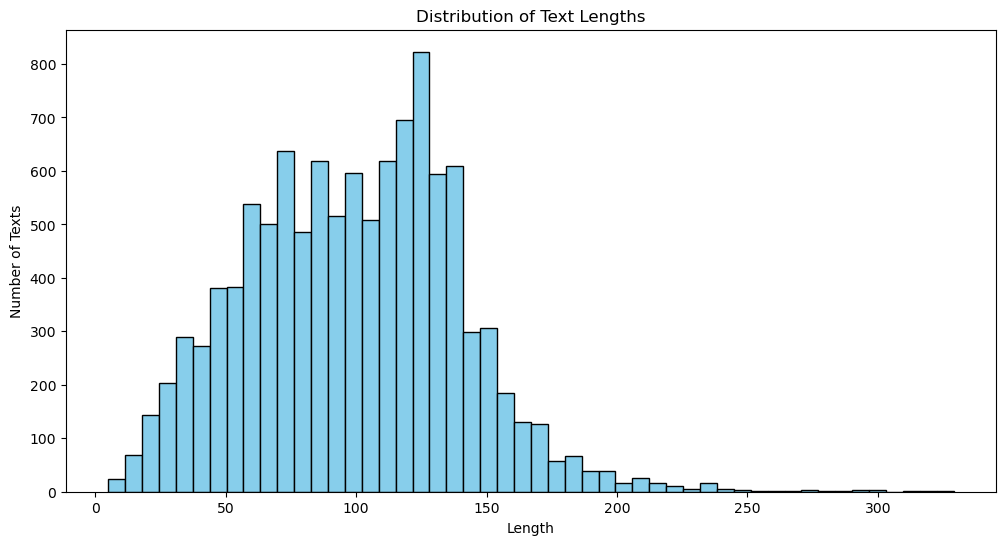

In [31]:
df['text_length'] = df['cleaned_text'].apply(len)

plt.figure(figsize=(12, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Text Lengths")
plt.xlabel("Length")
plt.ylabel("Number of Texts")
plt.show()


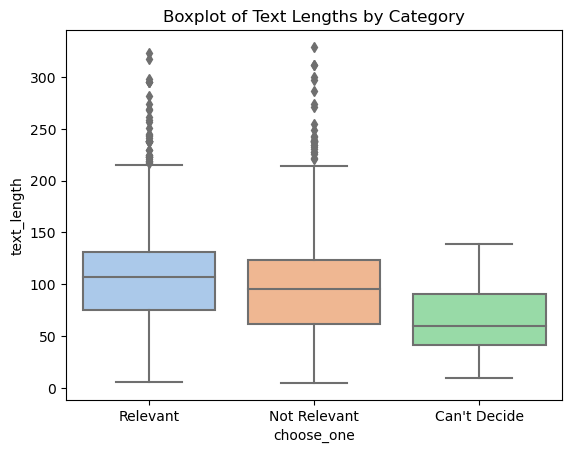

In [32]:
sns.boxplot(data=df, x='choose_one', y='text_length', palette='pastel')
plt.title("Boxplot of Text Lengths by Category")
plt.show()

# This shows us that if a tweet is marked as relevant, it is more likely to be longer than a tweet that is not relevant.


We now want to check what columns are categorical features. We suspect that `_unit_state`, `choose_one` and `choose_one_gold` may be categorical.

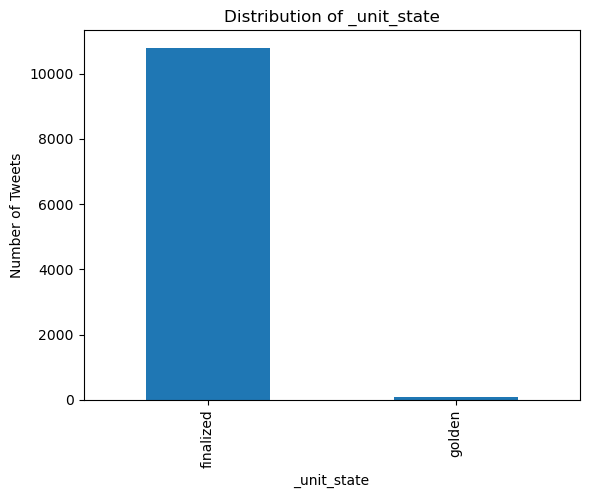

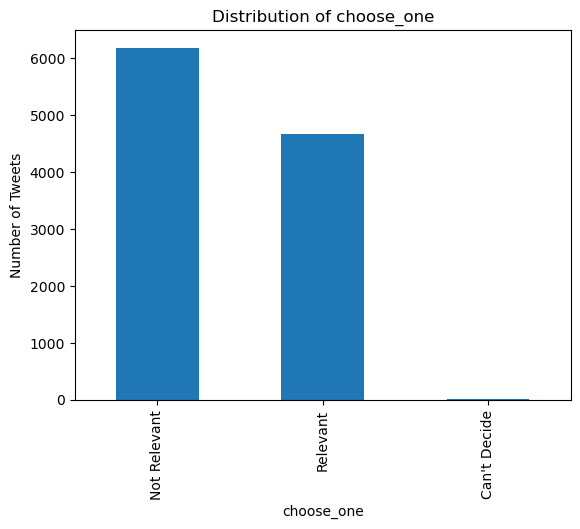

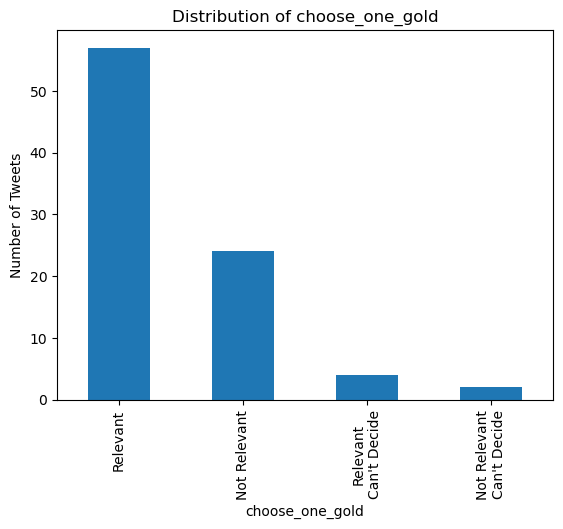

In [34]:
# Visualize each column named above using a bar chart
def plot_bar_chart(df, column):
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Number of Tweets')
    plt.show()

plot_bar_chart(df, '_unit_state')
plot_bar_chart(df, 'choose_one')
plot_bar_chart(df, 'choose_one_gold')

The `choose_one_gold` column seems to be a rare occurrence. Perhaps we should drop it. Rather, we'll perhaps stick to `choose_one`. 

In [40]:
# Select non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize empty list for potential categorical columns
potential_categorical_columns = []

# Iterate over non-numeric columns
for col in non_numeric_columns:
    try:
        # If unique values are less than 5% of total rows, consider the column as categorical
        if df[col].nunique() / len(df) < 0.05:
            potential_categorical_columns.append(col)
    except TypeError:
        # This will catch columns that cause the TypeError (e.g., columns with list-type values)
        # You can either skip these columns or handle them differently
        pass

print(potential_categorical_columns)

['_unit_state', 'choose_one', 'choose_one_gold', 'keyword']


In [42]:
import pandas as pd

# Use get_dummies to perform one-hot encoding on the 'choose_one' column
df_encoded = pd.get_dummies(df, columns=['choose_one'], prefix=['choose_one'])

# The dataframe df_encoded now has new columns corresponding to the unique values in the 'choose_one' column
# Each new column will be named "choose_one_<value_from_choose_one_column>"

# Print the head of all column containing the prefix 'choose_one'
print(df_encoded.filter(regex='choose_one').head())

   choose_one:confidence choose_one_gold  choose_one_Can't Decide  \
0                 1.0000        Relevant                        0   
1                 1.0000        Relevant                        0   
2                 1.0000        Relevant                        0   
3                 0.9603        Relevant                        0   
4                 1.0000        Relevant                        0   

   choose_one_Not Relevant  choose_one_Relevant  
0                        0                    1  
1                        0                    1  
2                        0                    1  
3                        0                    1  
4                        0                    1  
